# Exploration and Visualization

In [374]:
import pandas as pd
pd.set_option('display.max_columns', None)

import _pickle as pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

### Loading the DF

In [247]:
with open('clean_df.pkl', 'rb') as fp:
    df = pickle.load(fp)

In [248]:
df

,Species,Trap,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight,Month,Lat&Long,CULEX ERRATICUS,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,41.6-87.6,41.7-87.5,41.7-87.6,41.7-87.7,41.8-87.6,41.8-87.7,41.8-87.8,41.9-87.6,41.9-87.7,41.9-87.8,42.0-87.7,42.0-87.8,42.0-87.9,Aug,July,June,May,Oct,Sept
0,CULEX PIPIENS/RESTUANS,T002,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,May,42.0-87.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,CULEX RESTUANS,T002,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,May,42.0-87.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,CULEX RESTUANS,T007,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,May,42.0-87.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,CULEX PIPIENS/RESTUANS,T015,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,May,42.0-87.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,CULEX RESTUANS,T015,4,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,May,42.0-87.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5,CULEX RESTUANS,T045,2,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,May,41.9-87.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6,CULEX RESTUANS,T046,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,May,41.9-87.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7,CULEX PIPIENS/RESTUANS,T048,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,May,41.9-87.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,CULEX RESTUANS,T048,2,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,May,41.9-87.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
9,CULEX RESTUANS,T049,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,May,41.9-87.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


## Correlation
Checking if any features are correlated to __WnvPresent__

#### Function to Visualize Correlation

In [249]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

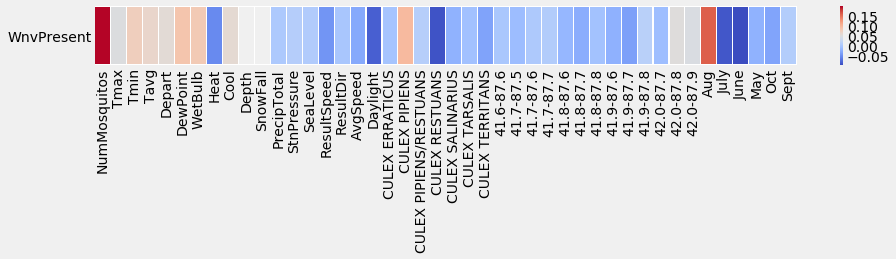

In [254]:
# Correlation Matrix
corr = df.corr().drop(['WnvPresent'], axis=1)

# Selecting only 'WnvPresent' to get its correlations with the other features
corr = corr.iloc[[corr.index.get_loc('WnvPresent')], :]

# Plotting the Correlation DF as a heatmap
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,1))
sns.heatmap(corr, annot=False, linewidths=.1, cmap="coolwarm")
plt.yticks(rotation=0)
plt.show()

## Class Balance Count

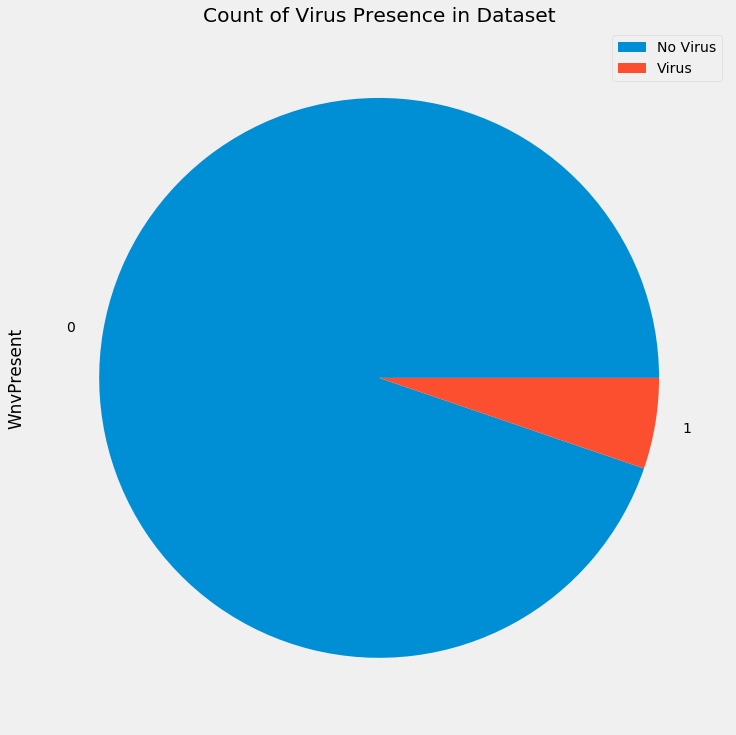

In [255]:
df.WnvPresent.value_counts().plot('pie', figsize=(12,12), 
                                  title='Count of Virus Presence in Dataset',
                                  legend=True).legend(['No Virus', 'Virus'])
plt.show()

### Count of Virus Presence among Species

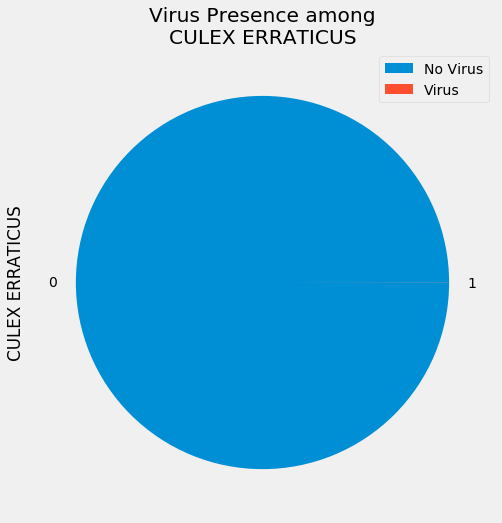

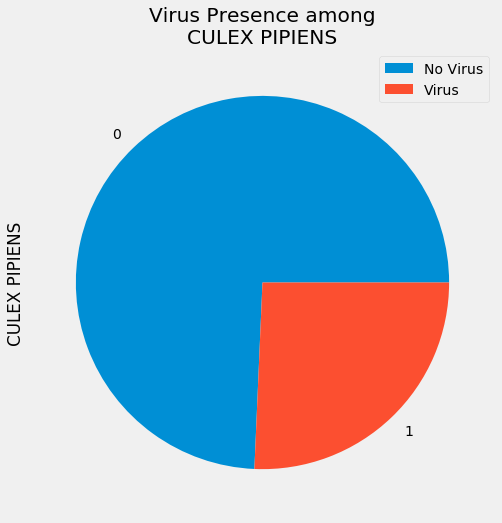

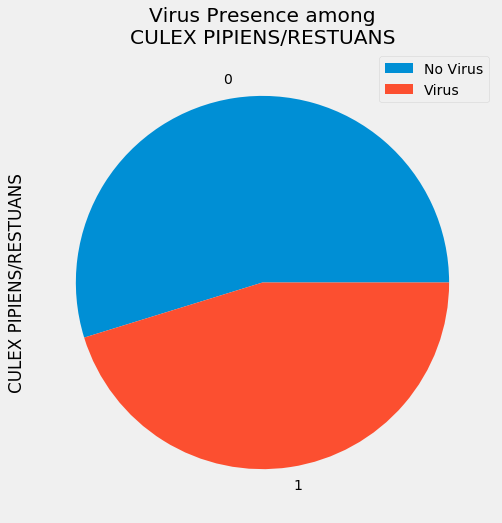

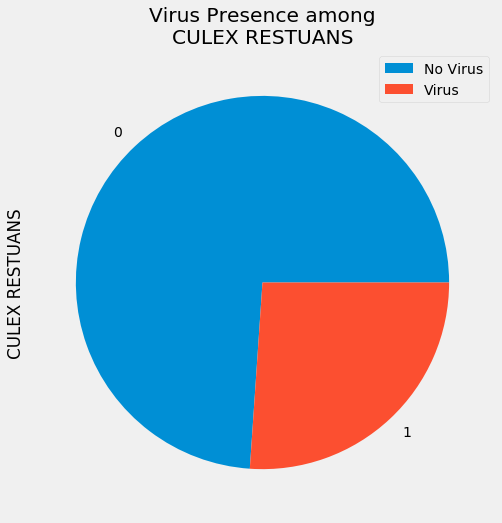

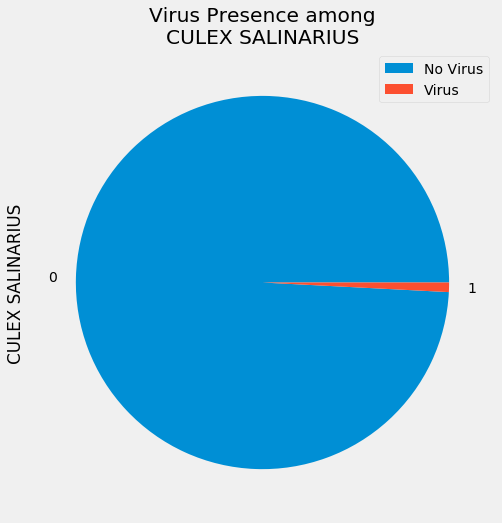

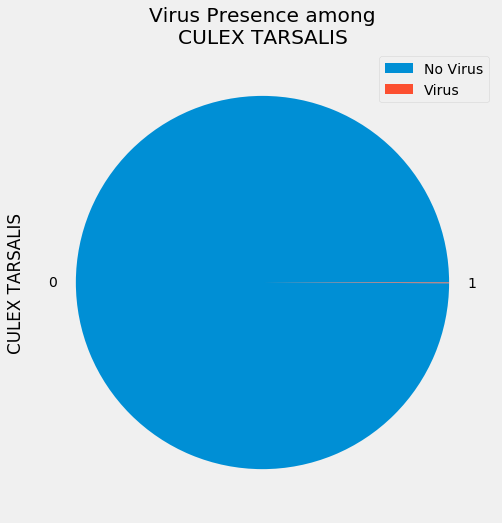

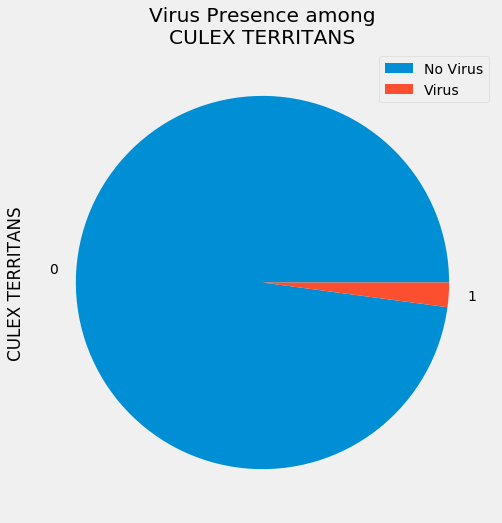

In [256]:
species = df.loc[:, 'CULEX ERRATICUS':'CULEX TERRITANS']

for i in species.columns:
    
    # Counting and plotting the presence of the virus amongst the species
    species[i].value_counts().plot('pie',
                                   figsize=(8,8),
                                   title='Virus Presence among\n' + i,
                                   legend=True).legend(['No Virus', 'Virus'])
    plt.show()

### Number of Mosquitoes in Traps

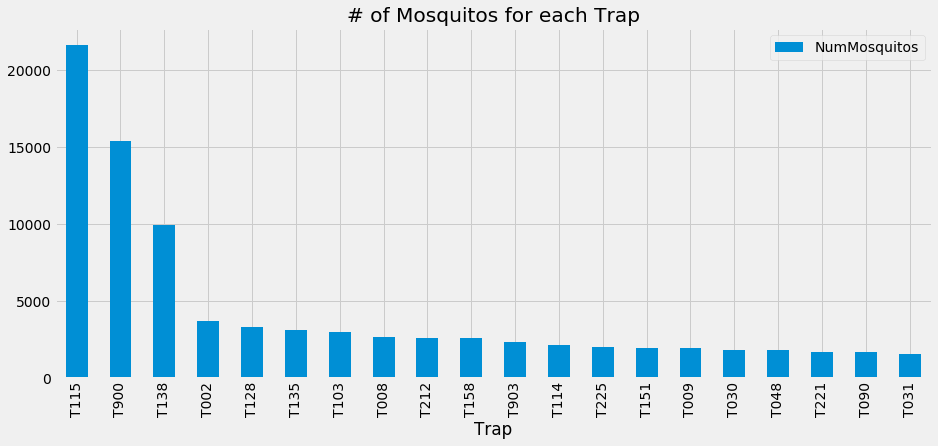

In [291]:
# Plotting and sorting by quantity of mosquitos
df.groupby('Trap').sum()[['NumMosquitos']].sort_values(by='NumMosquitos', 
                                                       ascending=False)[:20].plot.bar(figsize=(14,6), 
                                                                                      title='# of Mosquitos for each Trap')





### Traps with Infections Present

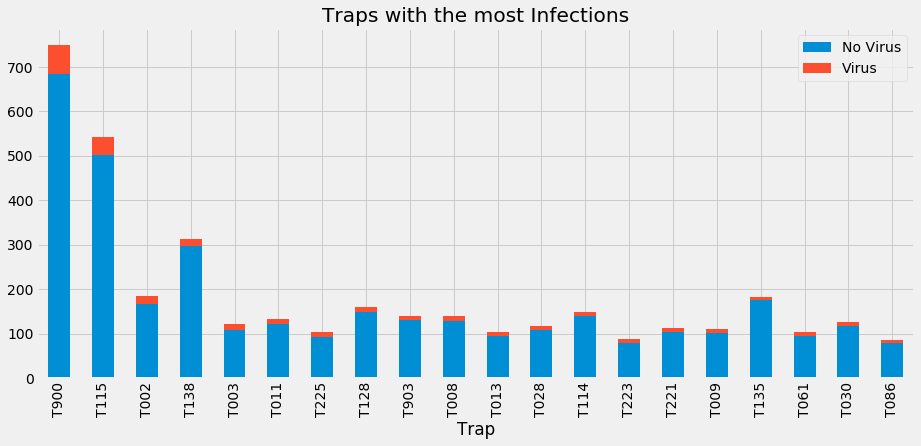

In [300]:
# Plotting and sorted by Virus presence
df.groupby('Trap').WnvPresent.value_counts().unstack().fillna(0).sort_values(by=1,
                                                                             ascending=False)[:20].plot.bar(figsize=(14,6),
                                                                                                            stacked=True, 
                                                                                                            title='Traps with the most Infections',
                                                                                                            legend=True).legend(['No Virus','Virus'])

### Number of Mosquitoes infected with the Virus for each Species

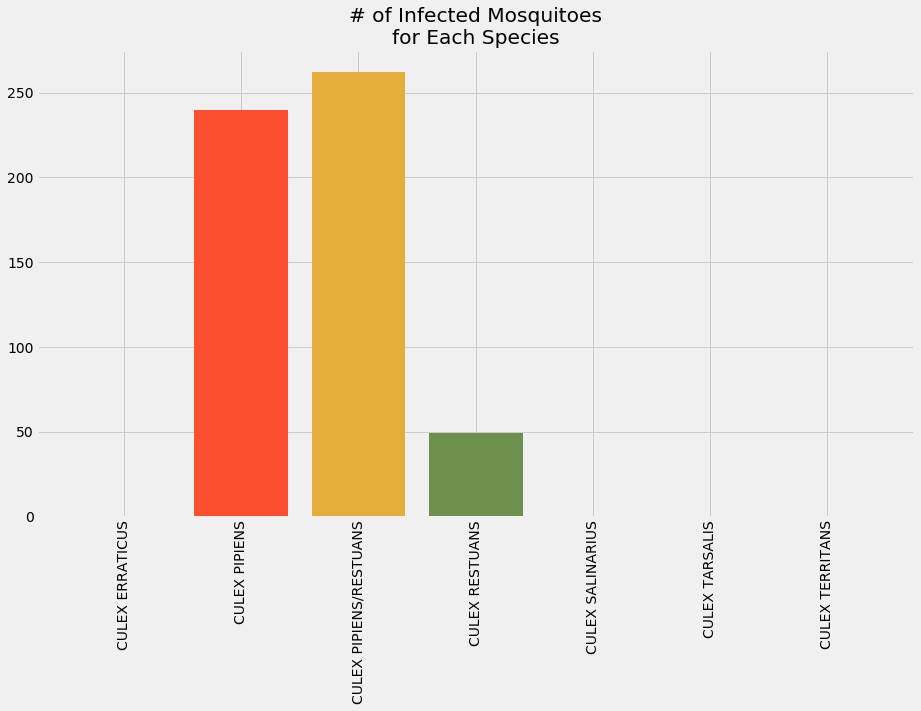

In [301]:
infected = df[df.WnvPresent==1].loc[:, 'CULEX ERRATICUS':'CULEX TERRITANS']

plt.figure(figsize=(14,8))
plt.title("# of Infected Mosquitoes\nfor Each Species")

for i in infected.columns:
    plt.bar(i, infected[infected[i]==1].shape[0])
    plt.xticks(rotation=90)

### Number of Mosquitos Recorded for each Species

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a202c80f0>],
      dtype=object)

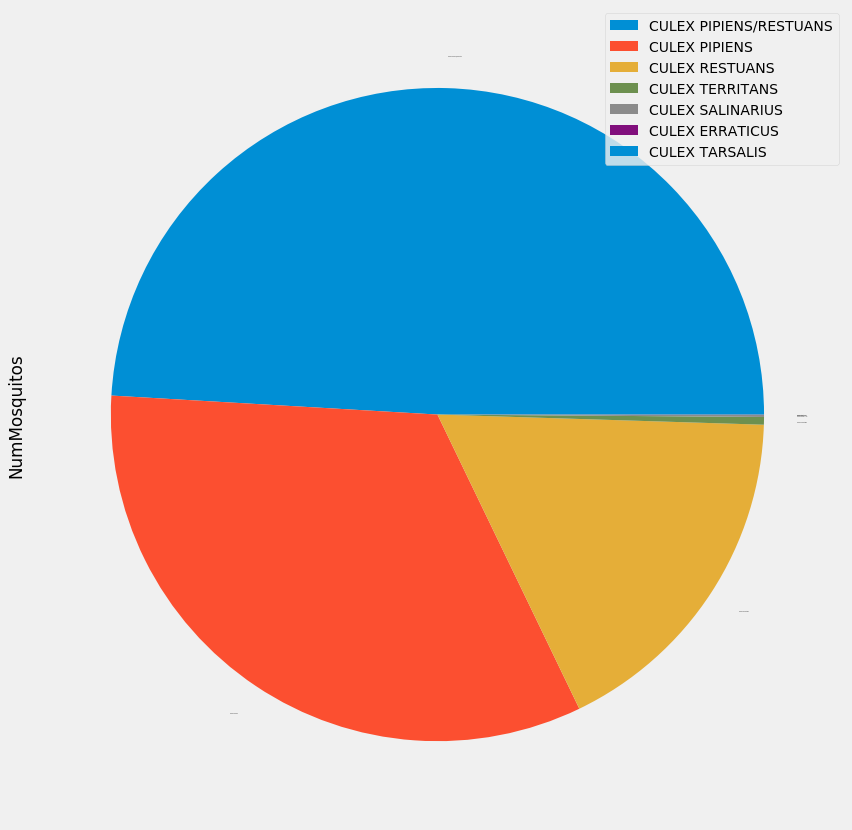

In [331]:
# Plotting the representation of each species in the dataset
df.groupby('Species').sum()[['NumMosquitos']].sort_values(by='NumMosquitos', 
                                                          ascending=False).plot(kind='pie', 
                                                                                subplots=True, 
                                                                                figsize=(14,14), 
                                                                                legend=True,
                                                                                fontsize=0)


### Monthly Distribution

<Figure size 1008x576 with 0 Axes>

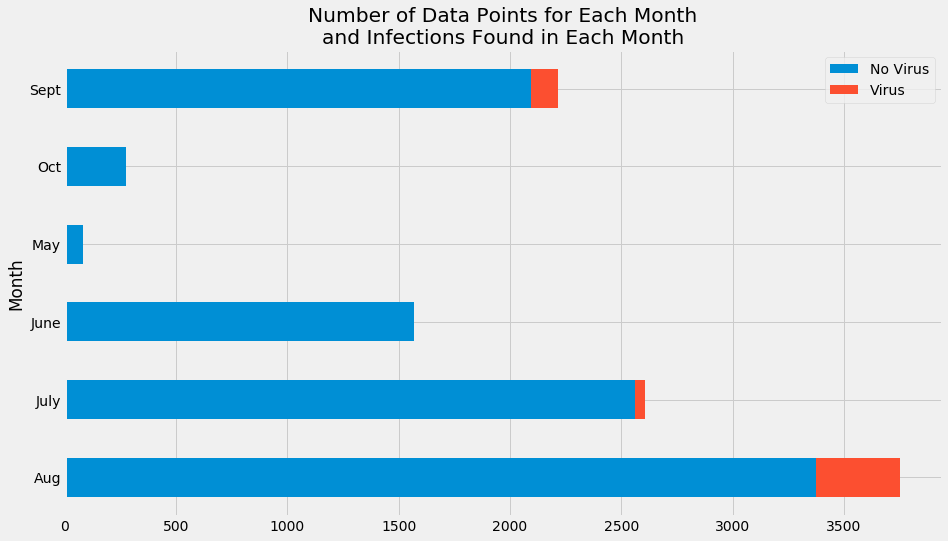

In [302]:
plt.figure(figsize=(14,8))

df.groupby('Month').WnvPresent.value_counts().unstack().fillna(0).plot.barh(stacked=True, 
                                                                            legend=True,
                                                                            figsize=(14,8)).legend(['No Virus', 'Virus'])

plt.title("Number of Data Points for Each Month\nand Infections Found in Each Month")
plt.show()

### Area Distribution

<Figure size 1008x576 with 0 Axes>

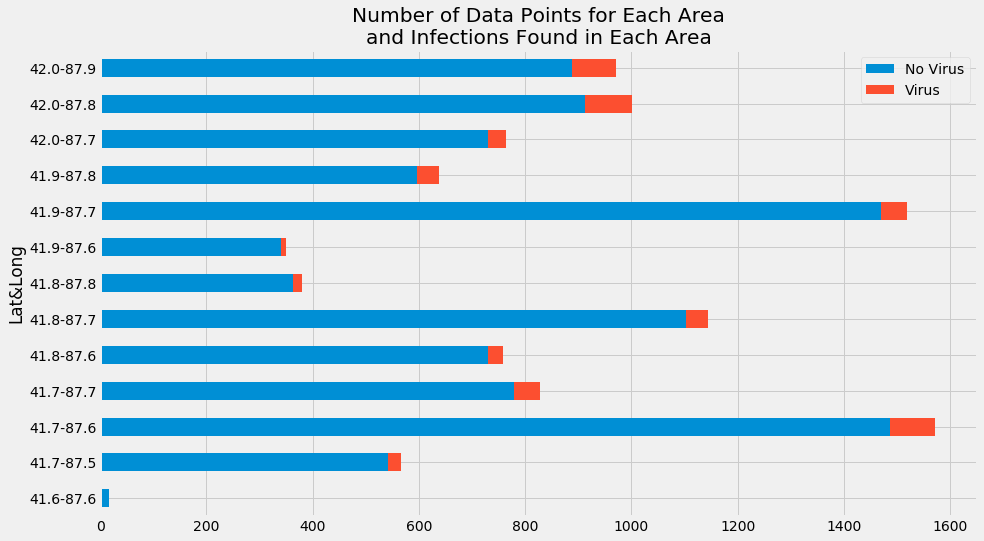

In [303]:
plt.figure(figsize=(14,8))

# Plotting the presence of the virus within in each area based on latitude and longitude
df.groupby('Lat&Long').WnvPresent.value_counts().unstack().fillna(0).plot.barh(stacked=True, 
                                                                            legend=True,
                                                                            figsize=(14,8)).legend(['No Virus', 'Virus'])

plt.title("Number of Data Points for Each Area\nand Infections Found in Each Area")
plt.show()

### Virus and # of Mosquitos in Relationship to Temperature

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


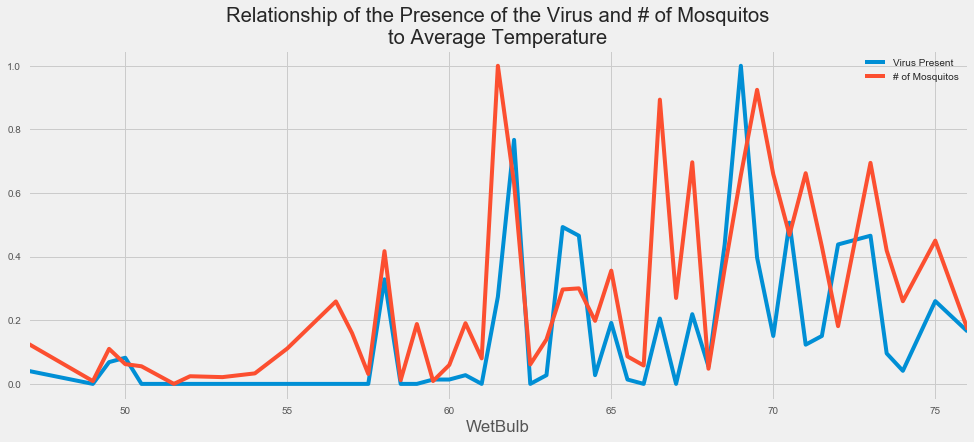

In [408]:
plt.style.use('fivethirtyeight')

# DF consisting of the average temperature and the sum of the pre
data = df.groupby('WetBulb').sum()[['WnvPresent','NumMosquitos']].sort_values(by='WetBulb', ascending=True)

# Scaling because of the wildly different values between the presence of the Virus and the # of Mosquitos
scaler = MinMaxScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

data_scaled.plot(figsize=(15,6),
                 title='Relationship of the Presence of the Virus and # of Mosquitos\nto Average Temperature',
                 legend=True).legend(['Virus Present', '# of Mosquitos'])

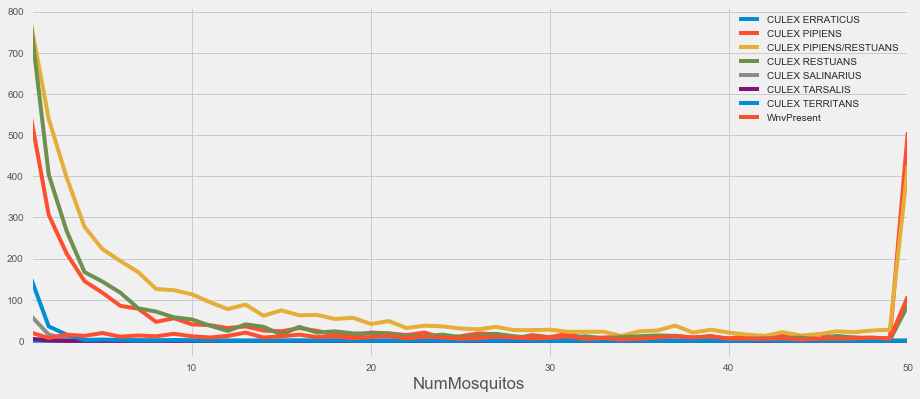

In [413]:
df.groupby('NumMosquitos').sum()[list(species.columns) + ['WnvPresent']].plot(figsize=(14,6))